In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. RNA-seq tutorial: analyzing RNA-seq data at different time points

Myocardial infarction (MI) is one of the deadliest diseases in the world, and the changes at the molecular level after MI are not clear. Understanding the molecular characteristics of the early stages of MI is of significance for the treatment of the disease. In this study, RNA-seq were performed on heart tissue from mouse models at multiple time points (0 h, 10 min,1 h, 6 h, 24 h and 72 h) to explore genetic features that influence MI progression. GEO accession: GSE206281.

## 1.1. Gene expression visualization across different time groups

Read RNA-seq data obtained at different time points:

In [2]:
df1=pd.read_csv('./undergrad_chemistry_class_tutorial/GSE206282_RAW/GSM6249220_0h_FPKM.csv')
df2=pd.read_csv('./undergrad_chemistry_class_tutorial/GSE206282_RAW/GSM6249223_10m_FPKM.csv')
df3=pd.read_csv('./undergrad_chemistry_class_tutorial/GSE206282_RAW/GSM6249226_1h_FPKM.csv')
df4=pd.read_csv('./undergrad_chemistry_class_tutorial/GSE206282_RAW/GSM6249229_6h_FPKM.csv')
df5=pd.read_csv('./undergrad_chemistry_class_tutorial/GSE206282_RAW/GSM6249232_24h_FPKM.csv')
df6=pd.read_csv('./undergrad_chemistry_class_tutorial/GSE206282_RAW/GSM6249235_72h_FPKM.csv')

For the convenience of data visualization, we only choose `200 genes` in each dataset to compare gene expressions across different time points.

In [3]:
df1=df1.iloc[9400:9600]
df2=df2.iloc[9400:9600]
df3=df3.iloc[9400:9600]
df4=df4.iloc[9400:9600]
df5=df5.iloc[9400:9600]
df6=df6.iloc[9400:9600]

Combine dataframes for different time points into one dataset:

In [4]:
df_concat=pd.concat([df1[['gene_id', 'Mcon3']], df2['M10m3'], df3['Mlh3'], df4['M6h3'], df5['M24h3'], df6['M72h3']], axis=1)
df_concat=df_concat[['gene_id', 'Mcon3', 'M10m3', 'Mlh3', 'M6h3', 'M24h3', 'M72h3']]
df_concat.reset_index(drop=True, inplace=True)

Plot the gene expression data at each time point against the control group (0h)

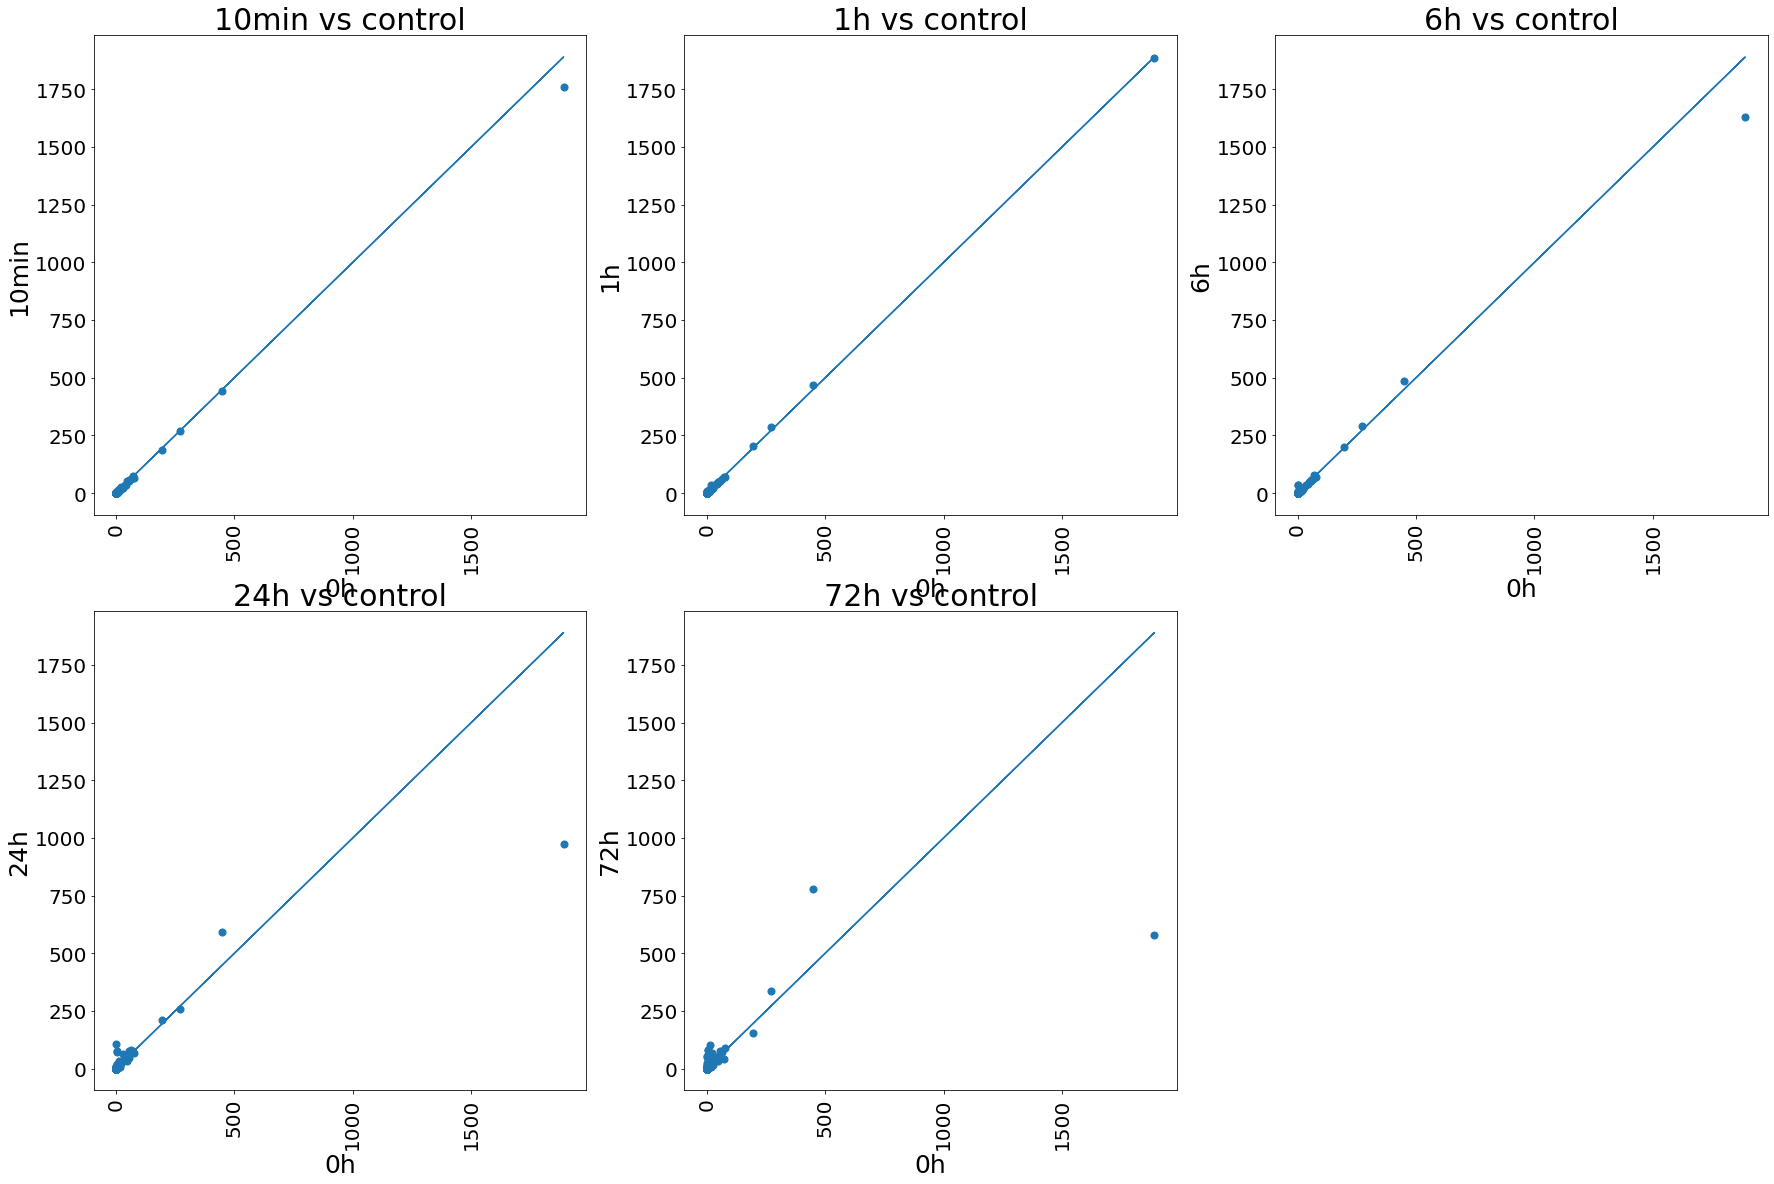

In [20]:
plt.rcParams['font.size'] = 20
plt.rc('axes', labelsize=25)
plt.rc('axes', titlesize=30)
plt.figure(1, figsize=(30, 30))
plt.subplot(331, xlabel='0h', ylabel='10min', title='10min vs control')
plt.scatter(df_concat.Mcon3, df_concat.M10m3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.xticks(rotation=90)
plt.subplot(332, xlabel='0h', ylabel='1h', title='1h vs control')
plt.scatter(df_concat.Mcon3, df_concat.Mlh3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.xticks(rotation=90)
plt.subplot(333, xlabel='0h', ylabel='6h', title='6h vs control')
plt.scatter(df_concat.Mcon3, df_concat.M6h3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.xticks(rotation=90)
plt.subplot(334, xlabel='0h', ylabel='24h', title='24h vs control')
plt.scatter(df_concat.Mcon3, df_concat.M24h3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.xticks(rotation=90)
plt.subplot(335, xlabel='0h', ylabel='72h', title='72h vs control')
plt.scatter(df_concat.Mcon3, df_concat.M72h3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.xticks(rotation=90)
plt.show()

## 1.2. Visualization of differentially expressed genes at different time points

We can see that at `hours 24 and 72`, gene expressions tend to deviate from the control group. We take an arbitrary threshold that the gene expression deviation from the control is more than `50 FPKM` (the absolute value of the difference between different hour groups and the control group)

In [6]:
df_24h_control=pd.concat([df5[['gene_id', 'M24h3']], df1['Mcon3']], axis=1)
df_24h_control['deviation']=abs(df_24h_control.M24h3-df_24h_control.Mcon3)

Genes that are differentially expressed at `24h`:

In [7]:
df_24h_control[df_24h_control.deviation>50]

,gene_id,M24h3,Mcon3,deviation
9417,ENSMUSG00000034994,593.289027,448.679559,144.609468
9541,ENSMUSG00000035373,74.646508,2.709700,71.936808
9546,ENSMUSG00000035385,108.876450,1.757678,107.118772
9569,ENSMUSG00000035458,975.247573,1889.829144,914.581571
9578,ENSMUSG00000035493,71.930393,6.432828,65.497565


In [8]:
# To create a list of differentially expressed genes at 24h
list_differentially_expressed_genes_at_24h=df_24h_control[df_24h_control.deviation>50].gene_id.tolist()

Re-plot the gene expression scatter plot between `24h` and `0h` to highlight differentially expressed genes:

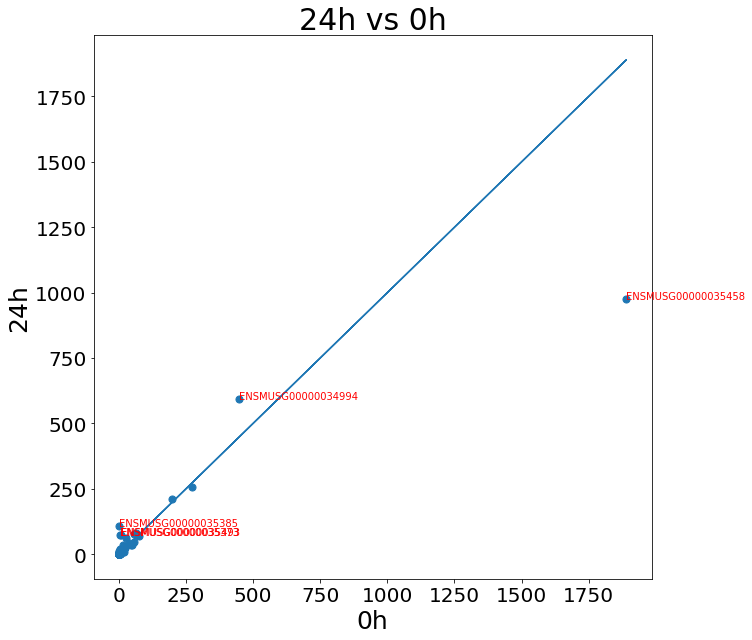

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(df_concat.Mcon3, df_concat.M24h3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.title("24h vs 0h")
plt.xlabel("0h")
plt.ylabel("24h")
  
# Loop for annotation of all points
for i in range(len(df_concat)):
    if df_concat.gene_id[i] in list_differentially_expressed_genes_at_24h:
        plt.annotate(df_concat.gene_id[i], (df_concat.Mcon3[i], df_concat.M24h3[i] + 0.1), fontsize=10, color='red')

Barplot to only focus on the differentially expressed genes at `0h` and `24h`.

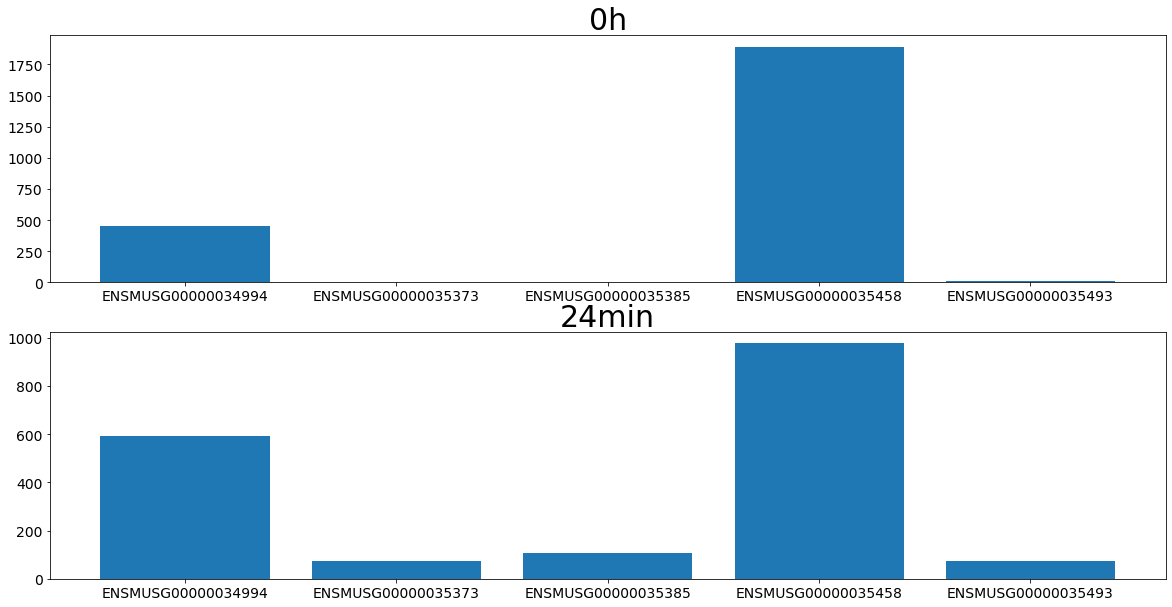

In [10]:
#only barplot differentially expressed genes at two time points (0h and 24h)
plt.figure(1, figsize=(20, 10))
plt.rcParams['font.size'] = 14
plt.subplot(211, title='0h')
plt.bar(df1[df1.gene_id.isin(list_differentially_expressed_genes_at_24h)].gene_id, df1[df1.gene_id.isin(list_differentially_expressed_genes_at_24h)].Mcon3)
plt.subplot(212, title='24min')
plt.bar(df5[df5.gene_id.isin(list_differentially_expressed_genes_at_24h)].gene_id, df5[df5.gene_id.isin(list_differentially_expressed_genes_at_24h)].M24h3)
plt.show()

In [11]:
df_72h_control=pd.concat([df6[['gene_id', 'M72h3']], df1['Mcon3']], axis=1)
df_72h_control['deviation']=abs(df_72h_control.M72h3-df_72h_control.Mcon3)

In [12]:
#Look for genes with expression level deviated more than 50 FPKM from the control group and make them into a list:
list_differentially_expressed_genes_at_72h=df_72h_control[df_72h_control.deviation>50].gene_id.tolist()

Gene that are differentially expressed at `72h`:

In [13]:
# Show all the genes with deviation larger than 50 FPKM
df_72h_control[df_72h_control.deviation>50]

,gene_id,M72h3,Mcon3,deviation
9407,ENSMUSG00000034957,80.547091,3.987817,76.559274
9416,ENSMUSG00000034993,104.315133,14.509189,89.805944
9417,ENSMUSG00000034994,779.917276,448.679559,331.237717
9497,ENSMUSG00000035242,334.311430,271.753808,62.557622
9541,ENSMUSG00000035373,55.711642,2.709700,53.001941
9569,ENSMUSG00000035458,577.809735,1889.829144,1312.019409
9578,ENSMUSG00000035493,78.823089,6.432828,72.390261


Re-plot the gene expression scatter plot between `72h` and `0h` to highlight differentially expressed genes:

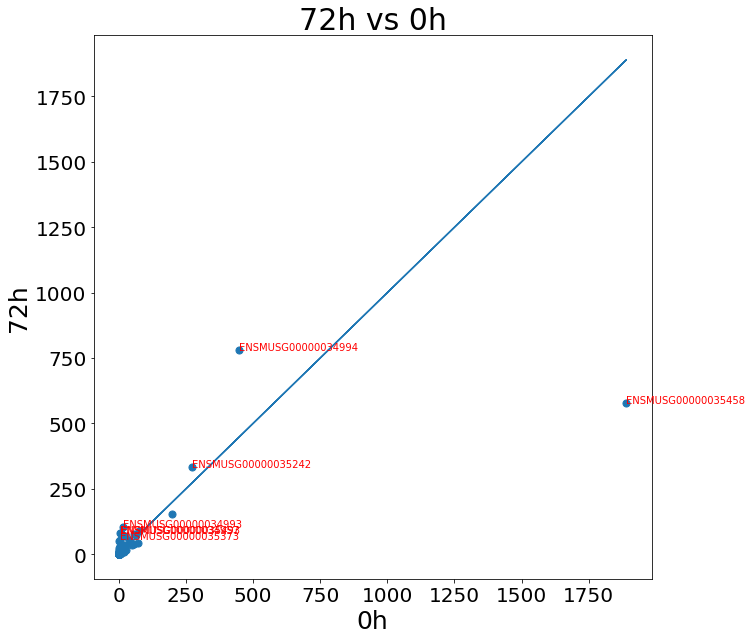

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(df_concat.Mcon3, df_concat.M72h3, s=50)
plt.plot(df_concat.Mcon3, df_concat.Mcon3, linestyle='-')
plt.title("72h vs 0h")
plt.xlabel("0h")
plt.ylabel("72h")
  
# Loop for annotation of all points and only annotate differentially expressed genes
for i in range(len(df_concat)):
    if df_concat.gene_id[i] in list_differentially_expressed_genes_at_72h:
        plt.annotate(df_concat.gene_id[i], (df_concat.Mcon3[i], df_concat.M72h3[i] + 0.1), fontsize=10, color='red')

Barplot to only focus on differentially expressed genes at `0h` and `72h`

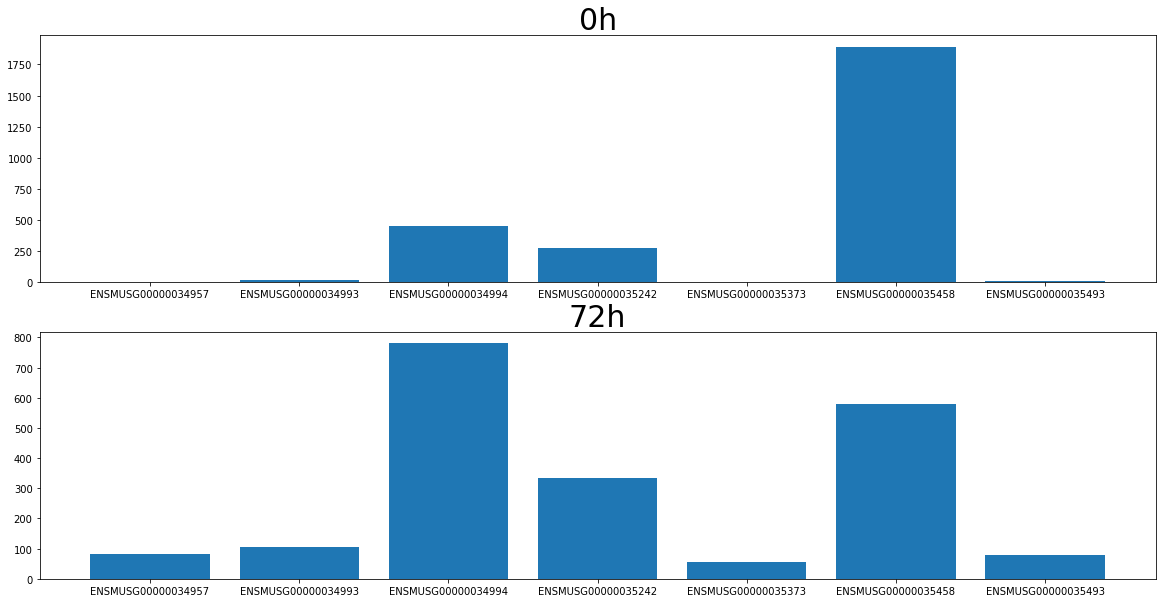

In [15]:
# only barplot differentially expressed gene at two time points (0h and 72h)
plt.figure(1, figsize=(20, 10))
plt.rcParams['font.size'] = 10
plt.subplot(211, title='0h')
plt.bar(df1[df1.gene_id.isin(list_differentially_expressed_genes_at_72h)].gene_id, df1[df1.gene_id.isin(list_differentially_expressed_genes_at_72h)].Mcon3)
plt.subplot(212, title='72h')
plt.bar(df6[df6.gene_id.isin(list_differentially_expressed_genes_at_72h)].gene_id, df6[df6.gene_id.isin(list_differentially_expressed_genes_at_72h)].M72h3)
plt.show()

## 1.3. Associate differentially expressed genes with their gene ontology (GO)

Go to Uniprot (https://www.uniprot.org/) to look for gene ontology for each of the differentially expressed genes. You input "gene_id" into uniprot and search for the gene function. For example, if you input `"ENSMUSG00000034994"` into uniprot, it will give you the corresponding gene function.

GO revealed that the downregulated genes at 72 h were enriched in biological processes such as cardiac muscle contraction. `TNNI3 (ENSMUSG00000035458)`, which is among these genes, provides instructions for making a protein called cardiac troponin I, which is found solely in the heart (cardiac) muscle. Cardiac troponin I is one of three proteins that make up the troponin protein complex in cardiac muscle cells. Downregulation of TNNI3 after MI may be an important cause of exacerbation of MI. In addition, the upregulated genes at 72 h were enriched in biological processes, such as cell-cell adhesion, regulation of the apoptotic signalling pathway and regulation of angiogenesis.

**Acknowledgements:** This tutorial was developed by Yue Wang at the University of North Carolina at Chapel Hill.